In [1]:
# Chargement des librairies

library(sparklyr, quietly = T)
library(tidyverse, warn.conflicts = FALSE, quietly = T)
library(lubridate)
library(tableone)

# Connexion à Spark

config <- spark_config()
sc <- spark_connect(master = "yarn-cluster", config = config, version = '2.4.3')


Attaching package: ‘sparklyr’


The following object is masked from ‘package:SparkR’:

    collect


Warning message:
“Failed to locate timezone database”
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.4.3     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()      masks SparkR::arrange()
✖ dplyr::between()      masks SparkR::between()
✖ dplyr::coalesce()     masks SparkR::coalesce()
✖ dplyr::collect()      masks sparklyr::collect(), SparkR::collect()
✖ dplyr::contains()     masks tidyr::contains(), SparkR::contains()
✖ dplyr::count()        masks SparkR::count()
✖ dplyr::cume_dist()    masks SparkR::cume_dist()
✖ dplyr::dense_rank()   masks SparkR::dense_rank()
✖ dplyr::desc()         masks SparkR::desc()
✖ dplyr::distinct()     masks SparkR::distinct()
✖ dplyr::expl

In [2]:
# Chargement des tables de data_management

tbl_change_db(sc, 'cse_200007_work')

spark_read_parquet(sc, 'sejours_rea_48_heures', 'sejours_rea_48_heures')
spark_read_parquet(sc, 'anticoag_patients_sejours_rea', 'anticoag_patients_sejours_rea')
spark_read_parquet(sc, 'labos_patients_sejours_rea', 'labos_patients_sejours_rea')
spark_read_parquet(sc, 'donnees_aggregees_labos', 'donnees_aggregees_labos')
spark_read_parquet(sc, 'donnees_aggregees_anticoag', 'donnees_aggregees_anticoag')
spark_read_parquet(sc, 'donnees_aggregees_filtrees_anticoag', 'donnees_aggregees_filtrees_anticoag')

# Source: spark<sejours_rea_48_heures> [?? x 137]
   encounter_num        location_cd chads_vasc patient_num   start_date_stay    
   <chr>                <chr>            <dbl> <chr>         <dttm>             
 1 1752665996291562278  UFR:026514           5 -44776191188… 2020-03-26 17:34:00
 2 -1216813316260103597 UFR:047242           4 503041227234… 2020-04-28 00:22:00
 3 5231337347460984291  UFR:021034           1 630754093753… 2020-08-20 15:02:00
 4 4488450525641231673  UFR:010030           1 -76298360079… 2015-10-25 21:25:00
 5 7528092672442711970  UFR:014025           4 309675344945… 2016-03-26 10:48:00
 6 -5245953818264138025 UFR:087260           2 424144902461… 2016-03-31 10:44:00
 7 5141568838889163811  UFR:066228           1 152722916276… 2020-10-28 10:00:00
 8 -2051142377238092640 UFR:095013           1 799828159422… 2020-11-28 13:10:00
 9 22559297188542165    UFR:014025           1 -70001673345… 2013-09-26 14:31:00
10 8705411307031176160  UFR:014025           5 777880438427

# Source: spark<anticoag_patients_sejours_rea> [?? x 26]
   encounter_num   patient_num concept_cd instance_num_lab nval_num quantity_num
   <chr>           <chr>       <chr>      <chr>               <dbl>        <dbl>
 1 -8371677380891… -210723128… LAB:A0350  570936238368671…     0.28          0.3
 2 -1715734469923… 6474626658… LAB:A0350  835087526167559…     0.1           0.3
 3 -1715734469923… 6474626658… LAB:A0350  -73544644586998…     0.42          0.3
 4 74702744951402… 1139430206… LAB:A0018  262858875554357…     0.33        NaN  
 5 51062603759991… 5985875502… LAB:A0350  -58279924586955…     0.31          0.3
 6 51062603759991… 5985875502… LAB:A0350  -79468161444009…     0.48          0.3
 7 51062603759991… 5985875502… LAB:A0350  -64882142008186…     0.33          0.3
 8 -6862206291490… -907720941… LAB:A0350  830575414553494…     0.75        NaN  
 9 51062603759991… 5985875502… LAB:A0350  -57336515953517…     0.12          0.3
10 51062603759991… 5985875502… LAB:A0350  -659043768

# Source: spark<labos_patients_sejours_rea> [?? x 26]
   start_date_lab      nval_num encounter_num  patient_num quantity_num units_cd
   <dttm>                 <dbl> <chr>          <chr>              <dbl> <chr>   
 1 2014-05-14 04:00:00    252   -529916748558… 5392932707…         55   µmol/L  
 2 2014-05-14 04:00:00     12.9 -529916748558… 5392932707…          2.5 mmol/L  
 3 2014-05-13 16:10:00      9.1 -529916748558… 5392932707…         13   g/dL    
 4 2014-05-11 19:30:00      3.5 2803733602221… 6645963747…          2   g/L     
 5 2014-05-19 05:30:00    285   -529916748558… 5392932707…         55   µmol/L  
 6 2014-05-19 05:30:00     16.1 -529916748558… 5392932707…          2.5 mmol/L  
 7 2014-05-11 19:30:00     10.1 2803733602221… 6645963747…         13   g/dL    
 8 2014-05-11 19:30:00    300   2803733602221… 6645963747…        150   x10*9/L 
 9 2014-05-18 04:00:00      8   -529916748558… 5392932707…         13   g/dL    
10 2014-05-18 04:00:00    113   -529916748558… 53929327

# Source: spark<donnees_aggregees_labos> [?? x 10]
   instance_num concept_cd_cat nb_tests moyenne mediane    min    max    sd
   <chr>        <chr>             <dbl>   <dbl>   <dbl>  <dbl>  <dbl> <dbl>
 1 10437205242  hemoglobine          69    8.77    8      6.6   18.3   2.4 
 2 10632278470  fibrinogene           4    4.58    4.65   3.94   5.06  0.47
 3 10914226309  uree                  5    7.8     8      5.4   10.4   2   
 4 11100428060  fibrinogene           3    3.7     3.4    2.5    5.2   1.37
 5 11410731089  plaquettes            4  164.    156.   129    215    38.8 
 6 11591175841  uree                  4    9.45    9.15   8.3   11.2   1.27
 7 11631641428  creat                 8  121.    128.    91    143    18.4 
 8 12206063411  uree                 11   18.5    18.8   17.2   19.7   0.85
 9 130063654    plaquettes           12  305.    290.   256    402    45.6 
10 133330119    uree                 30   12.0    12.2    6     19.3   3.96
# ℹ more rows
# ℹ 2 more variables: q

# Source: spark<donnees_aggregees_anticoag> [?? x 14]
   instance_num encounter_num        nb_total_tests_par_sejour duree_sejour
   <chr>        <chr>                                    <dbl>        <dbl>
 1 11631639416  -3775853939986390367                         9            7
 2 12981681338  -388213658652744528                          3            3
 3 12981734902  -9097925098844565662                         5            7
 4 14036503075  -1537084672087933863                         3            9
 5 142001843    -680819731703896309                          3            7
 6 142238454    -1489499003224630847                        12           14
 7 14350839928  4835772296449855757                          7           22
 8 14913511493  -151545882290912413                          1           20
 9 15060910152  4585203080107409208                          3            3
10 155240082    1243472077648777773                          1            6
# ℹ more rows
# ℹ 10 more variable

# Source: spark<donnees_aggregees_filtrees_anticoag> [?? x 17]
   instance_num encounter_num        nb_total_tests_par_sejour duree_sejour
   <chr>        <chr>                                    <dbl>        <dbl>
 1 11631639416  -3775853939986390367                         9            7
 2 12981681338  -388213658652744528                          3            3
 3 12981734902  -9097925098844565662                         5            7
 4 14036503075  -1537084672087933863                         3            9
 5 142001843    -680819731703896309                          3            7
 6 142238454    -1489499003224630847                        12           14
 7 14350839928  4835772296449855757                          7           22
 8 14913511493  -151545882290912413                          1           20
 9 15060910152  4585203080107409208                          3            3
10 155240082    1243472077648777773                          1            6
# ℹ more rows
# ℹ 13 more

In [3]:
sejours_rea_48_heures <- sc %>% tbl('sejours_rea_48_heures')
anticoag_patients_sejours_rea <- sc %>% tbl('anticoag_patients_sejours_rea')
labos_patients_sejours_rea <- sc %>% tbl('labos_patients_sejours_rea')
donnees_aggregees_labos <- sc %>% tbl('donnees_aggregees_labos')
donnees_aggregees_anticoag <- sc %>% tbl('donnees_aggregees_anticoag')
donnees_aggregees_filtrees_anticoag <- sc %>% tbl('donnees_aggregees_filtrees_anticoag')

In [11]:
summary(as_tibble(sejours_rea_48_heures))

 encounter_num      location_cd          chads_vasc    patient_num       
 Length:4962        Length:4962        Min.   :0.000   Length:4962       
 Class :character   Class :character   1st Qu.:1.000   Class :character  
 Mode  :character   Mode  :character   Median :2.000   Mode  :character  
                                       Mean   :2.236                     
                                       3rd Qu.:3.000                     
                                       Max.   :7.000                     
                                                                         
 start_date_stay               end_date_stay                 instance_num      
 Min.   :2011-06-12 06:48:00   Min.   :2011-06-16 17:03:00   Length:4962       
 1st Qu.:2016-12-30 16:32:00   1st Qu.:2017-01-08 13:03:00   Class :character  
 Median :2018-11-08 09:25:30   Median :2018-11-15 15:12:00   Mode  :character  
 Mean   :2018-04-28 14:02:33   Mean   :2018-05-05 14:05:17                     
 3rd Qu.

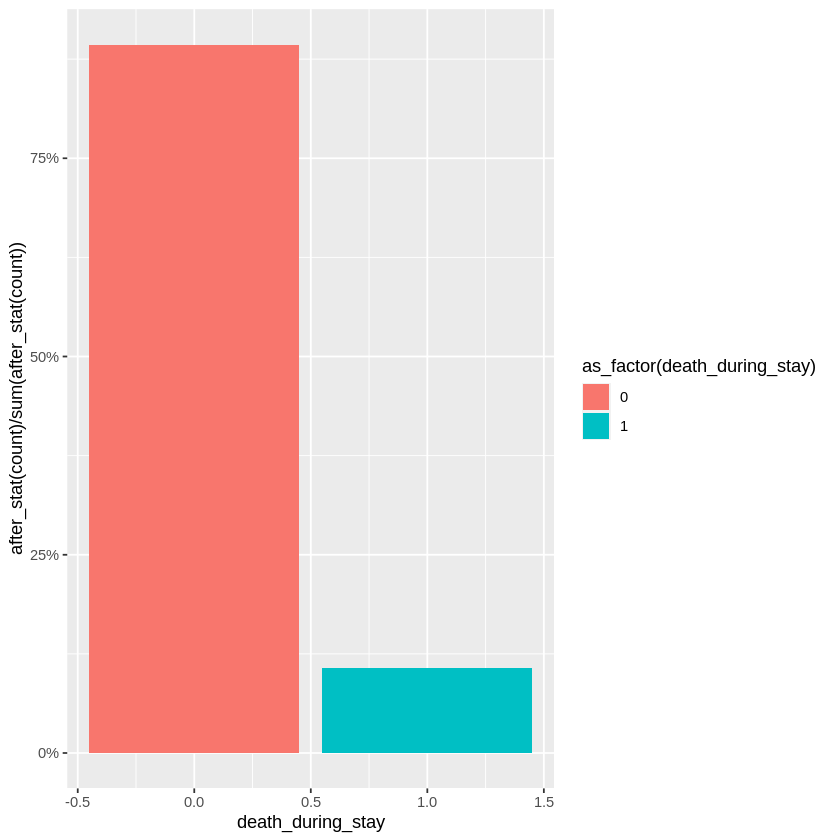

In [5]:
# Répartition des patients par sexe et statut vital à la sortie du séjour en réanimation

sejours_rea_48_heures %>%
    ggplot() + geom_bar(aes(x = death_during_stay, y = after_stat(count)/sum(after_stat(count)), fill = as_factor(death_during_stay))) + scale_y_continuous(labels = scales::percent)

Warning message:
“Removed 6 rows containing non-finite values (`stat_count()`).”


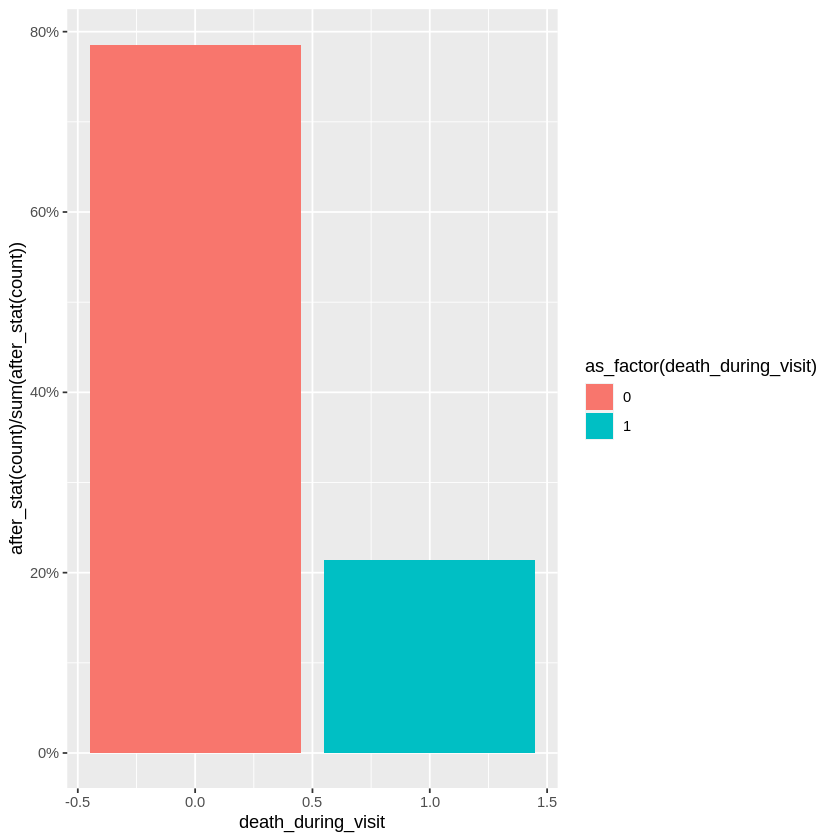

In [6]:
# Répartition des patients par sexe et statut vital à la sortie de l'hospitalisation durant laquelle s'est déroulé le séjour en réanimation

sejours_rea_48_heures %>%    
    ggplot() + geom_bar(aes(x = death_during_visit, y = after_stat(count)/sum(after_stat(count)), fill = as_factor(death_during_visit))) + scale_y_continuous(labels = scales::percent)

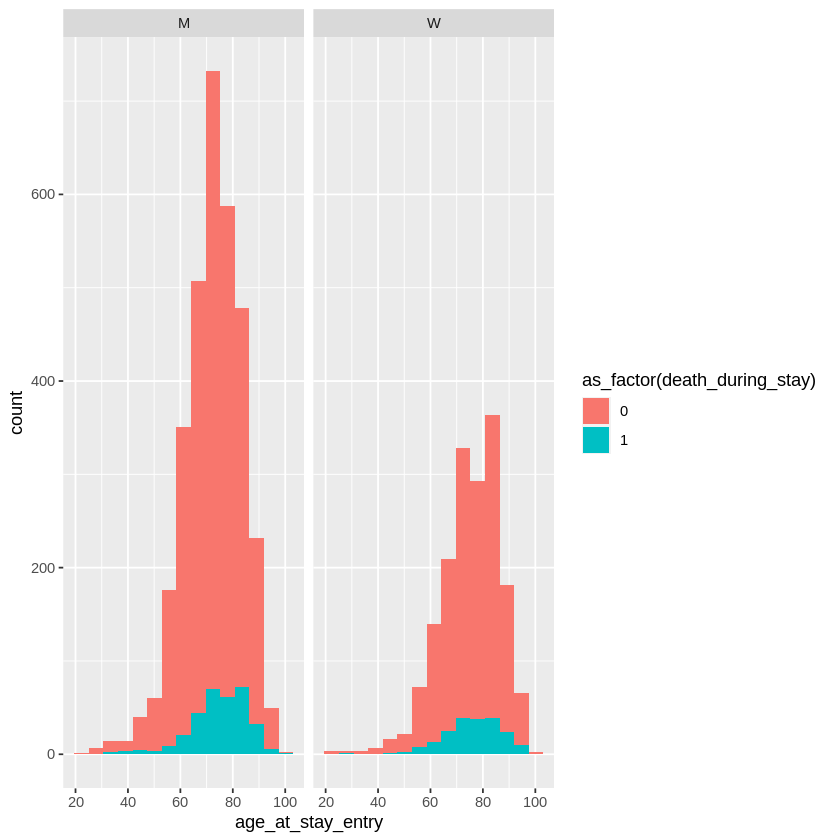

In [7]:
# Répartition des patients par tranche d'âge et statut vital à la sortie de la réanimation

sejours_rea_48_heures %>%
ggplot() + geom_histogram(aes (x = age_at_stay_entry, fill = as_factor(death_during_stay)), bins = 15) + facet_wrap (~sex_cd)

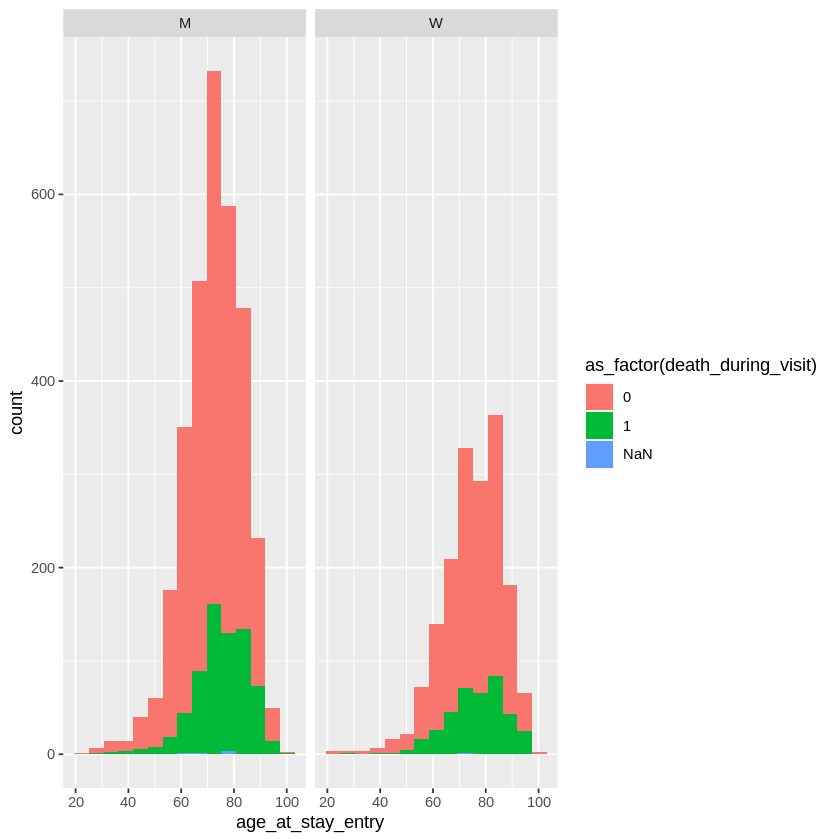

In [8]:
# Répartition des patients par tranche d'âge et statut vital à la sortie de l'hospitalisation durant laquelle a été effectué le séjour en réanimation

sejours_rea_48_heures %>%
ggplot() + geom_histogram(aes (x = age_at_stay_entry, fill = as_factor(death_during_visit)), bins = 15) + facet_wrap (~sex_cd)

In [9]:
# Durées de séjours - représentation graphique de la moyenne et de l'écart-type

sejours_rea_48_heures %>%
    summarise(dms_mean=mean(duree_sejour), dms_median=percentile(duree_sejour,0.5), dms_sd=sd(duree_sejour)) %>%
    as_tibble()

Warning message:
“Missing values are always removed in SQL.
Use `mean(x, na.rm = TRUE)` to silence this warning
This warning is displayed only once per session.”


dms_mean,dms_median,dms_sd
<dbl>,<dbl>,<dbl>
7.244055,5,8.132315


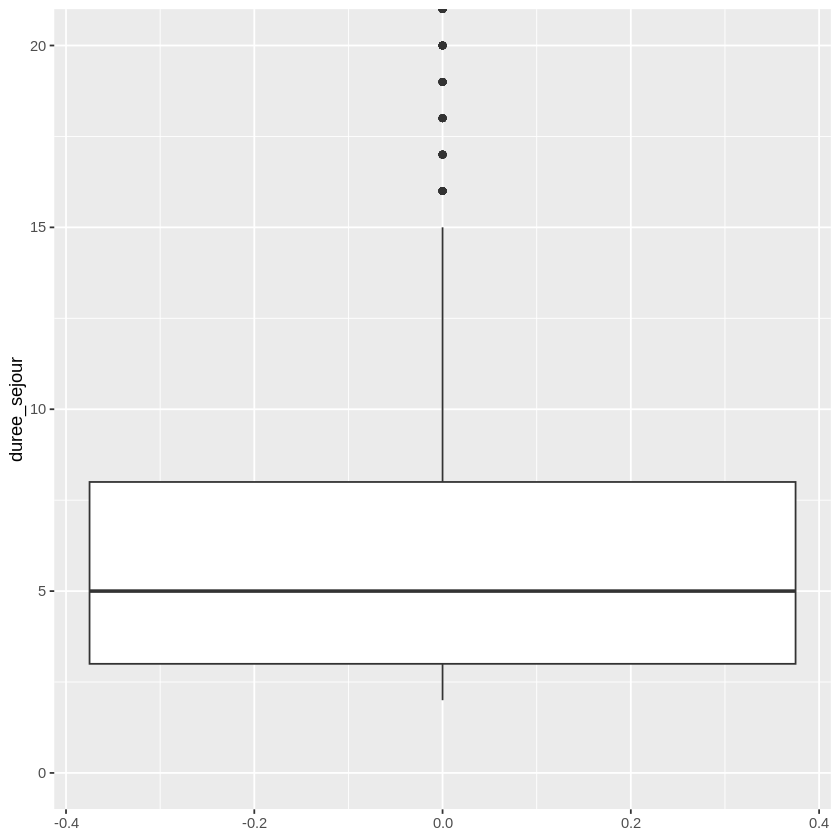

In [10]:
# Durées de séjours - représentation graphique de la médiane et des IQS

sejours_rea_48_heures %>%
ggplot() + geom_boxplot(aes(y = duree_sejour)) + coord_cartesian(ylim = c(0, 20))

Warning message:
“Removed 16 rows containing non-finite values (`stat_boxplot()`).”


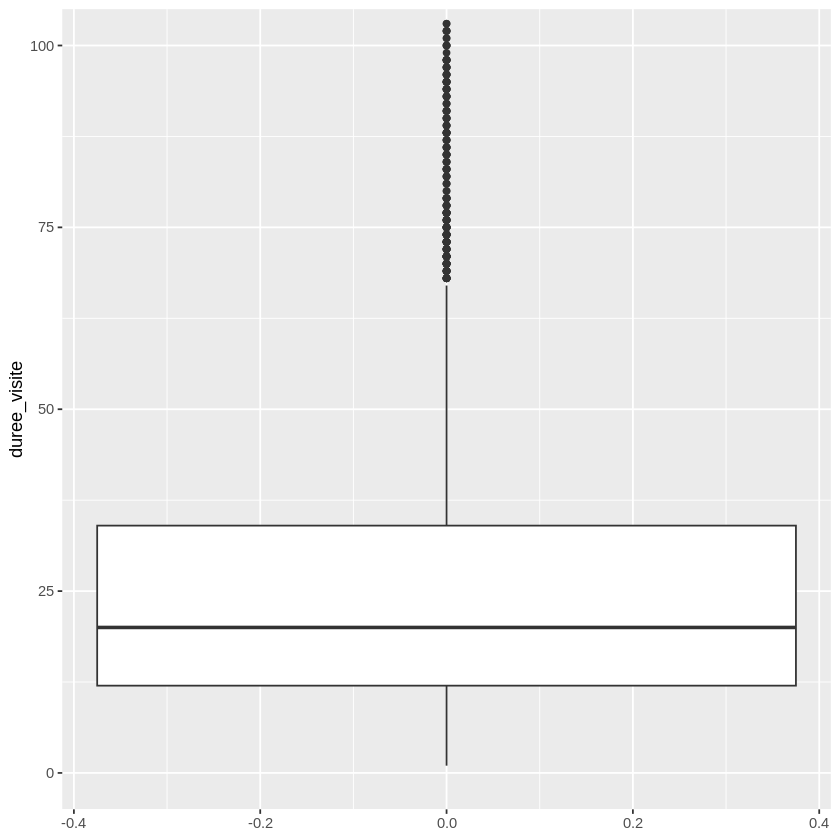

In [11]:
sejours_rea_48_heures %>%
ggplot() + geom_boxplot(aes(y = duree_visite)) + coord_cartesian(ylim = c(0, 100))

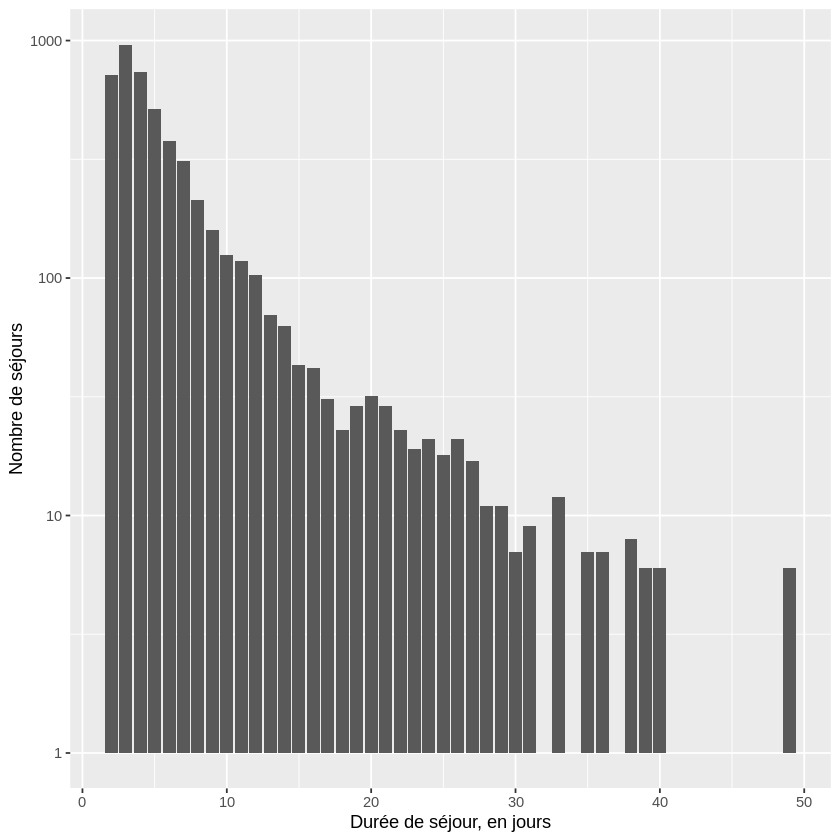

In [11]:
# Durée de séjour en jours (durée minimale 48 heures car table de départ filtrée pour tous les séjours de plus de 48 heures)
sejours_rea_48_heures %>%
    group_by(duree_sejour) %>%
    summarise(nombre_sejour = n()) %>%

# Les séjours ne sont pas affichés si moins de 5 patients par durée de séjour 
    filter(nombre_sejour > 5) %>%

# Graphique (échelle logarithmique) 
# parait concordant avec la boxplot précédente
    ggplot() + geom_col(aes(x = duree_sejour, y = nombre_sejour)) +  xlab("Durée de séjour, en jours") + ylab("Nombre de séjours") + scale_y_continuous(trans = "log10")

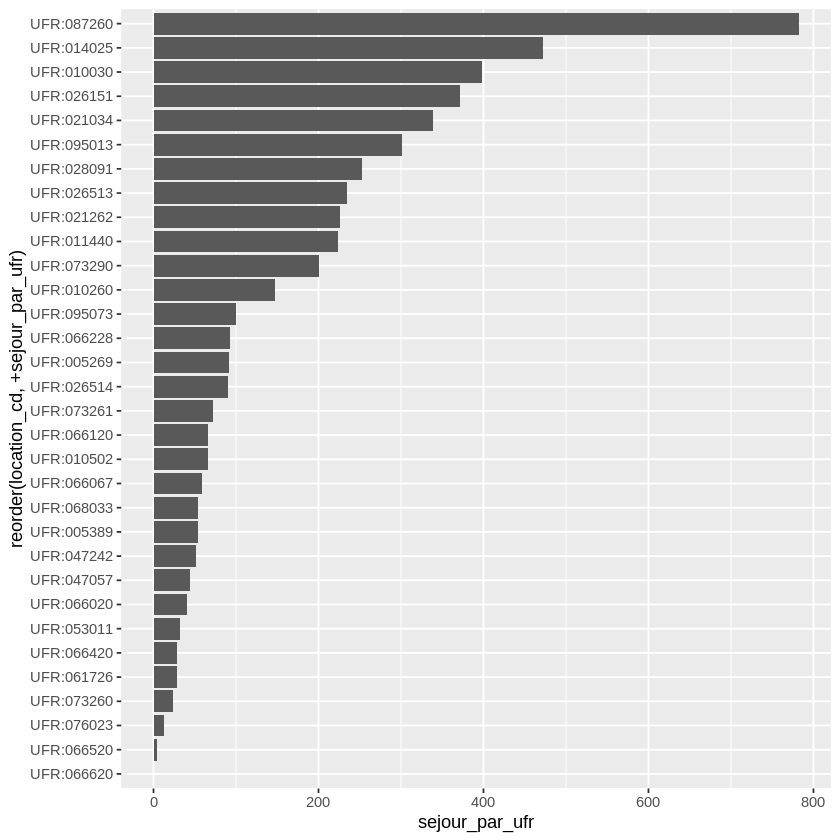

In [12]:
# Nombre de séjours par UFR

sejours_rea_48_heures %>%
    group_by(location_cd) %>%
    summarise(sejour_par_ufr = n()) %>%
#    as_tibble
    ggplot() + geom_col(aes(x = reorder(location_cd, +sejour_par_ufr), y = sejour_par_ufr)) + coord_flip()

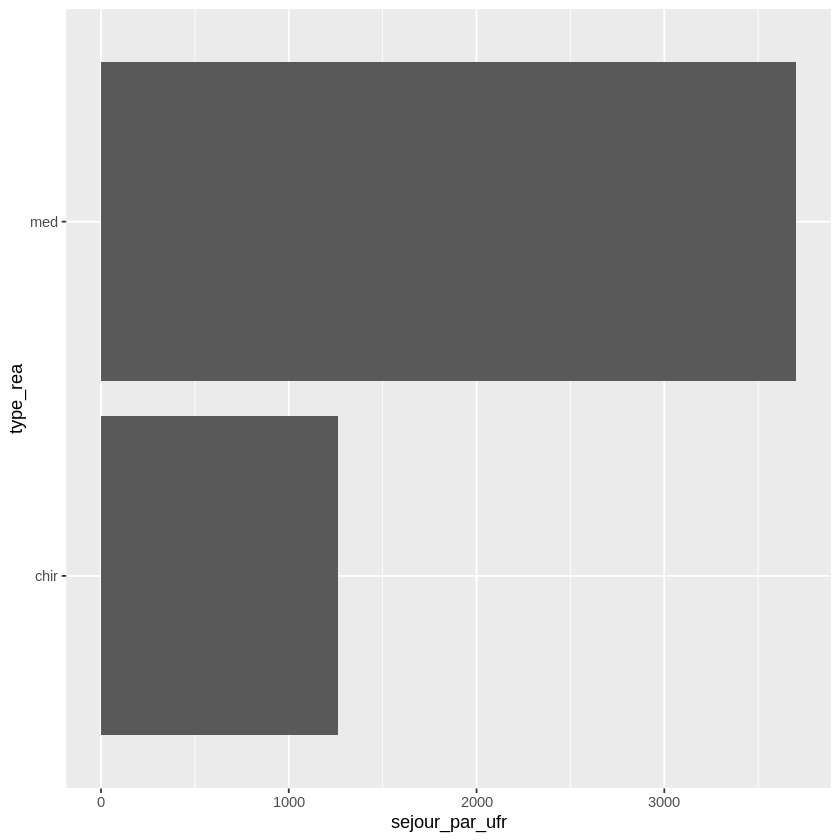

In [13]:
sejours_rea_48_heures %>%
    group_by(location_cd, type_rea) %>%
    summarise(sejour_par_ufr = n()) %>%
    ggplot() + geom_col(aes(x = type_rea, y = sejour_par_ufr)) + coord_flip()